## Oppstart

In [1]:
from dhlab.module_update import update, css

In [2]:
css()

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Note that the file `nbtext.py` will be overwritten in the code below

This is probably ok, though. If not, change `update('nbtext', overwrite = True)` to `update('nbtext', overwrite = False)` and the file will stay unchanged. 


In [4]:
import dhlab.nbtext as nb
import dhlab.token_map as tm
from dhlab.nbtext import get_urn, make_graph, get_urn, relaterte_ord, navn, totals
import dhlab.graph_networkx_louvain as gnl
import pandas as pd
%matplotlib inline

plot = lambda x,  lw=3, alpha= 0.7: x.plot(figsize=(15,6), lw=lw, alpha=alpha)


# Hjelpekommandoer

I den her notebooken er det satt opp kode for å telle opp navn i et korpus. Både listen med navn og korpuset må foreligge som excelfiler. Noen av kommandoene vil bli lagt til `token_map`-modulen 

* `tell_navn` teller opp navnene på tvers av korpuset 
* `korpus_oppføring` finner data i korpuset
* `vis_bok` viser navn i en spesifikk bok (benytter oppførings-kommandoen)
* `aggregate_pr_col` aggregerer navnedata over kolonner.

In [5]:
import pandas as pd
from nbtext import metadata

def alle_korpusnavn(korpus):
    urner = nb.pure_urn(korpus)
    alle_navn = tm.combine_names(tm.corpus_names(urner))
    return alle_navn

def tell_navn(korpus, token_map):
    res = dict()
    for urn in nb.pure_urn(korpus['urn']):
        try:
            res[urn] = tm.count_name_strings(str(urn), token_map)
            res[urn].columns = [str(urn)]
        except:
            print("Problemer med å telle fra: ", metadata(urn))
    return pd.concat([res[u] for u in res], axis=1)

def korpus_oppføring(df, text, column='tittel'):
    return nb.pure_urn(df[df[column].str.contains(text)]['urn'])

def add_metadata(korpus):
    korpus['metadata'] = ['_'.join([str(x) for x in z[2:4]]) for z in nb.metadata(korpus.urn)]
    return True

vis_bok = lambda x, column = 'metadata': nb.frame_sort(nb.frame(opptelling[korpus_oppføring(korpus, x, column)[0]].dropna(), nb.metadata(korpus_oppføring(korpus, x, column)[0])[0][3]))

    

## Navn i bøker


Vi søker etter navn i en bok, og en serie av bøker.

Kommandoene er:
1. `names` henter et sett med forslag til navn, fra nbtext
1. `show_names` gir en oversikt over funnene, fra token_map
1. `names_to_token_map_file` lagrer navneforslagene til en excelfil (eller csv) for redigering (token_map)
1. `read_token_map_file` henter redigert fil tilbake for analyse (token_map)
1. `character_network` lager graf for navnene (token_map)
1. `show_graph`  tegner grafen (fra graph_networkx_louvain)
1. `show_communities` viser clustre i grafen (graph_networkx_louvain)



## Korpus

Hent korpus fra excelfil. Det er korpuset det skal telles opp fra. Husk at korpuset som genererer navn kan godt være forskjellig fra der det telles.

In [10]:
#korpus = nb.restore_metadata_from_excel('Hamsunkorpus, kronologisk.xls')
korpus = nb.book_corpus(author='hamsun%')

filen Hamsunkorpus, kronologisk.xls ble ikke funnet


Neste linje fyller opp en kolonne med en kortversjon av metadata - til senere bruk. Linjen er viktig for å at vis_bok skal fungere (nesten).

## Ta en titt på korpuset som tabell

In [9]:
korpus

""


## Sjekk innholdet

Gjør noen søk for å se at alt er ok. Konkordanser er fine til det. 

In [36]:
nb.urn_concordance(word = 'Skogen', urns = korpus)

"Bjørger, Hamsun, Knut, 1878","; mange vandfosse nedover ,",Skogen,var i løvsprætten ; den
"Fra det moderne Amerikas Aandsliv, Hamsun, Knut, 1889","Farver som en Kolibri ,",Skogen,er en Skog af yderst
"Sult, Hamsun, Knut, 1890",kunde jeg søge ud i,Skogen,"et Sted , jeg havde"
"Sult, Hamsun, Knut, 1890",end at gaa ud i,Skogen,et Sted . Naar bare
"Sult, Hamsun, Knut, 1890",kunde ikke komme ud i,Skogen,"iaften , det fik gaa"
"Mysterier, Hamsun, Knut, 1892",funden død her borte i,Skogen,et Sted ; hvad var
"Mysterier, Hamsun, Knut, 1892","væk , længer ind i",Skogen,; det var ved et
"Mysterier, Hamsun, Knut, 1892",fandt død her borte i,Skogen,forleden ? Var det ikke
"Mysterier, Hamsun, Knut, 1892",med ham i . I,Skogen,"Smaagutten gik Dagen lang ,"
"Mysterier, Hamsun, Knut, 1892",jeg bagefter gik ind i,Skogen,og holdt Hænderne for Øjnene
"Ny Jord, Hamsun, Knut, 1893",trives ikke der oppe i,Skogen,. «


### Hent redigert fil

Husk at verdien på orient må være lik mellom lagring og lesing av excelfil. Typisk for den her type redigering er radorientering. Excel har en begrensning på 256 kolonner, som blir for smått for de fleste anvendelser. Det er tilnærmet ubegrenset kapasitet på antall rader.

In [11]:
redigerte_navn = tm.read_token_map_file("ner-samledeverker.xls", orient = "row")

FileNotFoundError: [Errno 2] No such file or directory: 'ner-samledeverker.xls'

## Tell opp navn med hensyn til det som står i `redigerte_navn`

Bruker hjelpekommando `tell_navn`. Det kan ta litt tid, noen minutter å telle opp.

In [12]:
opptelling = tell_navn(korpus, redigerte_navn)

Sånn ser opptellingen ut, en kolonne pr. bok. Nedenfor ser vi på det samlede resultatet, og hver bok.

In [40]:
opptelling

,2008112113001,2009061013011,2009061013012,2009061012004,2009042313001,2015051929001,2008123012002,2008123012003,2008123010002,2008082710002,...,2009051413002,2014021807090,2014120206051,2008091603021,2008091603020,2009061010002,2009061013010,2014080408001,2012041208040,2008042201022
Aabakken,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amerika,NaN,NaN,NaN,305.0,4.0,NaN,2.0,9.0,5.0,NaN,...,NaN,2.0,49.0,69.0,47.0,1.0,NaN,3.0,10.0,7.0
Amerikas_Vesten,1.0,NaN,NaN,3.0,1.0,4.0,5.0,NaN,1.0,NaN,...,1.0,2.0,2.0,6.0,NaN,NaN,2.0,1.0,1.0,1.0
Baku,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bergen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,27.0,NaN,3.0,NaN,NaN,NaN,1.0
Berlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Bjærget,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bjørger_Sulheim,NaN,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bodø,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,11.0,6.0,4.0,6.0,NaN,NaN,1.0
Bokhara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En aggregering over hele korpuset

In [13]:
nb.frame_sort(nb.frame(opptelling.sum(axis=1)))

,0
Verden,838.0
Skogen,718.0
Jorden,598.0
Amerika,579.0
Norges_Land,561.0
Polden,523.0
Segelfoss,401.0
Marken,384.0
Gaden,335.0
Jær,276.0


## Kommando `vis_bok`

Med den kommandoen benyttes deler av metadata for å finne boken. Skriv en bit av metadata, årstall og tittel. Bokens tittel står over kolonnen.

In [29]:
vis_bok('Marken')

,Markens Grøde
Marken,80.0
Skogen,61.0
Sellanraa,49.0
Jorden,33.0
Breidablik,30.0
Verden,18.0
Trondhjem,15.0
Bergen,14.0
Himlen,12.0
Sverige,10.0


# Lag en graf for en bok

Grafene kan legges sammen i etterkant om det ønskes en graf for hele korpuset.

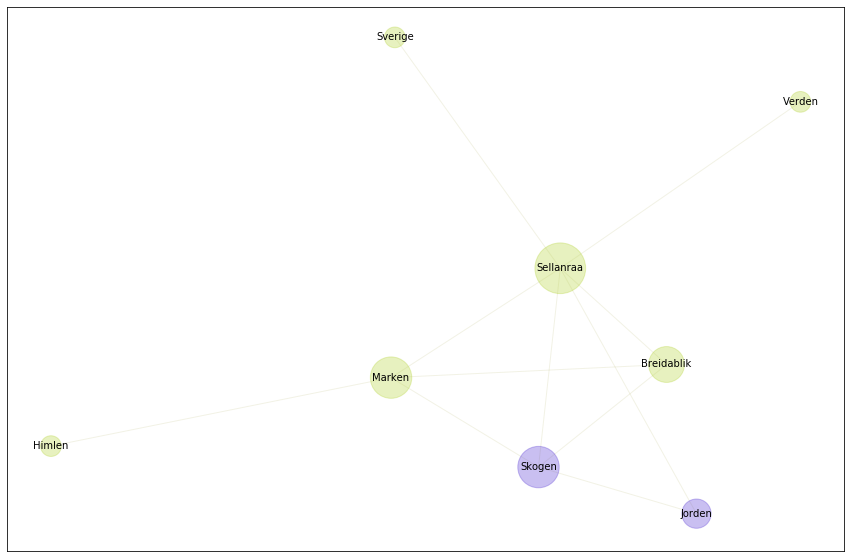

In [57]:
# fyll inn en indeks fra korpuslisten 0 er første URN, 1 neste osv. eller benytt korpus_oppføring

G = tm.character_network(korpus_oppføring(korpus, 'Mark'), redigerte_navn)
gnl.show_graph(G)

In [47]:
nb.metadata(korpus['urn'][3])

[[2009061012004,
  'Hamsun, Knut',
  1889,
  'Fra det moderne Amerikas Aandsliv',
  '',
  'Philipsen',
  'unknown',
  '949c8474bef0068c4d97f02c2f646284',
  'nob',
  '']]

Dernest kan den vises og analyseres med passende kommandoer

In [46]:
korpus.urn[3]

'2009061012004'